## **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

## **Load Dataset**

In [2]:
df = pd.read_csv('IBM.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

### Batasi Hanya Menggunakan Kolom 'Close'

In [3]:
data = df[['Close']]

### Normalisasi Data

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

### Buat Sequence

In [5]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

In [6]:
seq_length = 60
x, y = create_sequences(scaled_data, seq_length)

### Split Dataset

In [7]:
training_size = int(len(x) * 0.8)
x_train, y_train = x[:training_size], y[:training_size]
x_test, y_test = x[training_size:], y[training_size:]

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## **Training Model**

### Pembuatan Model

In [9]:
model = Sequential()

In [12]:
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.add(Dense(units=1))

### Compile Model

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Training Model

In [15]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0035
Epoch 2/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 1.0619e-04
Epoch 3/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 7.3227e-05
Epoch 4/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 6.1714e-05
Epoch 5/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 5.3793e-05
Epoch 6/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 3.9422e-05
Epoch 7/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4.1523e-05
Epoch 8/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 3.9454e-05
Epoch 9/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 4.1759e-05
Epoch 10/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 3.3834e-05
Epoch 11/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 3.7958e-05
Epoch 12/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 3.4714e-05
Epoch 13/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 3.1786e-05
Epoch 14/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 3.

## **Model Evaluation**

In [16]:
predicted_stock_price = model.predict(x_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [17]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

### Visualisasi Model

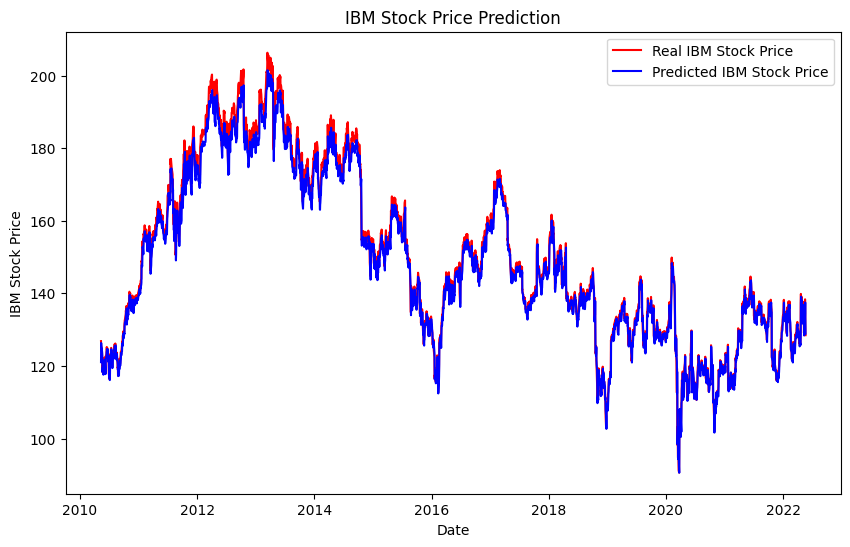

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df.index[-len(real_stock_price):], real_stock_price, color='red', label='Real IBM Stock Price')
plt.plot(df.index[-len(predicted_stock_price):], predicted_stock_price, color='blue', label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [21]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.305214842710514
